# Boosting Model Performance with Boosting

## Introduction to boosting

A **boosting algorithm is an ensemble technique that helps to improve model performance and accuracy by taking a group of weak learners and combining them to form a strong learner**. The idea behind boosting is that **predictors should learn from mistakes that have been made by previous predictors**.

Boosting algorithms have two key characteristics:

* First, they undergo multiple iterations
* Second, each iteration focuses on the instances that were wrongly classified by previous iterations

**When an input is misclassified by a hypothesis, its weight is altered in the next iteration so that the next hypothesis can classify it correctly**. **More weight will be given to those that provide better performance on the training data**. This process, through multiple iterations, **converts weak learners into a collection of strong learners**, thereby improving the model's performance.

In bagging, no bootstrap sample depends on any other bootstrap, so they all run in parallel. **Boosting works in a sequential manner and does not involve bootstrap sampling.** **Both bagging and boosting reduce the variance of a single estimate by combining several estimates from different models into a single estimate.** However, it is important to note that **boosting does not help significantly if the single model is overfitting**. **Bagging would be a better option if the model overfits**. On the other hand, **boosting tries to reduce bias, while bagging rarely improves bias**.

In this chapter, we will introduce different boosting algorithms such as Adaptive Boosting (AdaBoost), gradient boosting, and extreme gradient boosting (XGBoost).

## Implementing AdaBoost for disease risk prediction using scikit-learn

AdaBoost is one of the earliest boosting algorithms that was used for binary classification. It was proposed by Freund and Schapire in 1996. Many other boosting-based algorithms have since been developed on top of AdaBoost.

> Another variation of adaptive boosting is known as AdaBoost-abstain. AdaBoost-abstain allows each baseline classifier to abstain from voting if its dependent feature is missing.

AdaBoost focuses on combining a set of weak learners into a strong learner. The process of an AdaBoost classifier is as follows:

1. Initially, a short decision tree classifier is fitted onto the data. The decision tree can just have a single split, which is known as a decision stump. The overall errors are evaluated. This is the first iteration.
2. In the second iteration, whatever data is correctly classified will be given lower weights, while higher weights will be given to the misclassified classes.
3. In the third iteration, another decision stump will be fitted to the data and the weights will be changed again in the next iteration.
4. Once these iterations are over, the weights are automatically calculated for each classifier at each iteration based on the error rates to come up with a strong classifier.

The following screenshot shows how AdaBoost works:

![alt text](adaboost_working_process.png)

The concept behind this algorithm is to distribute the weights to the training example and select the classifier with the lowest weighted error. Finally, it constructs a strong classifier as a linear combination of these weak learners.

The general equation for an AdaBoost as follows:

$F(x) = \sum_{t=1}^{T} \alpha_t f_t(x)$

Here, $\text{F}(x)$ represents a strong classifier, $\alpha_t$ represent the weights, and $f_t(x)$ represents a weak classifier.

The AdaBoost classifier takes various parameters. The important ones are explained as follows:

* `base_estimator`: The learning algorithm that is used to train the models. If a value is not provided for this parameter, the base estimator is `DecisionTreeClassifier(max_depth=1)`.
* `n_estimators`: The number of models to iteratively train.
* `learning_rate`: The contribution of each model to the weights. By default, learning_rate has a value of $1$. A lower value for the learning rate forces the model to train slower but might result in better performance scores.

### Getting ready

To start with, import the os and the pandas packages and set your working directory according to your requirements:

In [17]:
# import required packages
import os
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [18]:
# Read the dataset:

df_breastcancer = pd.read_csv("breastcancer.csv")
# Take a look at the first few rows with the head() function:

df_breastcancer.head(5)
# Notice that the diagnosis variable has values such as M and B, representing Malign and Benign,
# respectively. We will perform label encoding on the diagnosis variable so that we can convert
# the M and B values into numeric values.
# We use head() to see the changes:
# import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df_breastcancer['diagnosis'] = lb.fit_transform(df_breastcancer['diagnosis']) 
df_breastcancer.head(5)

# We then check whether the dataset has any null values:

df_breastcancer.isnull().sum()
# We check the shape of the dataset with shape():

df_breastcancer.shape
# We now separate our target and feature set. We also split our dataset into training and testing subsets:

# Create feature & response variables
# Drop the response var and id column as it'll not make any sense to the analysis
X = df_breastcancer.iloc[:, 2:31]

# Target
y = df_breastcancer.iloc[:, 0]
    
# Create train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify= y)
# Now, we will move on to building our model using the AdaBoost algorithm.
# It is important to note that the accuracy and AUC scores may differ because of random 
# splits and other randomness factors.

### How to do it

We will now look at how to use an AdaBoost to train our model:

In [19]:
# 1 Before we build our first AdaBoost model, let's train our model using the DecisionTreeClassifier:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

# 2 We can see our accuracy and Area Under the Curve (AUC) with the following code:
# Mean accuracy
print('The mean accuracy is: ',(dtree.score(X_test,y_test))*100,'%')

#AUC score
y_pred_dtree = dtree.predict_proba(X_test)
fpr_dtree, tpr_dtree, thresholds = roc_curve(y_test, y_pred_dtree[:,1])
auc_dtree = auc(fpr_dtree, tpr_dtree)
print ('AUC Value: ', auc_dtree)
# We get an accuracy score and an AUC value of 91.81% and 0.91, respectively. Note that these values might be different for different users due to randomness.

The mean accuracy is:  91.81286549707602 %
AUC Value:  0.9161799065420559


In [20]:
# 3 Now, we will build our AdaBoost model using the scikit-learn library. We will use the AdaBoostClassifier to build our
# AdaBoost model. AdaBoost uses dtree as the base classifier by default:
AdaBoost = AdaBoostClassifier(n_estimators=100, estimator=dtree, learning_rate=0.1, random_state=0)
AdaBoost.fit(X_train, y_train)

,estimator,DecisionTreeC...andom_state=0)
,n_estimators,100
,learning_rate,0.1
,algorithm,'deprecated'
,random_state,0
,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [21]:
# 4 We check the accuracy and AUC value of the model on our test data:
# Mean accuracy
print('The mean accuracy is: ',(AdaBoost.score(X_test,y_test))*100,'%')

#AUC score
y_pred_adaboost = AdaBoost.predict_proba(X_test)
fpr_ab, tpr_ab, thresholds = roc_curve(y_test, y_pred_adaboost[:,1])
auc_adaboost = auc(fpr_ab, tpr_ab)
print ('AUC Value: ', auc_adaboost)
# We notice that we get an accuracy score of 95.32% and an AUC value of 0.98. Both of these metrics are higher
# than the decision tree model we built in Step 1.

The mean accuracy is:  95.32163742690058 %
AUC Value:  0.9849591121495327


In [22]:
# 5 Then, we must fine-tune our hyperparameters. We set n_estimators to 100 and learning_rate to 0.4:
# Tuning the hyperparams
AdaBoost_with_tuning = AdaBoostClassifier(n_estimators=100, estimator=dtree, learning_rate=0.4, random_state=0)
AdaBoost_with_tuning.fit(X_train, y_train)

# 6 Now, we will check the accuracy and AUC values of our new model on our test data:
# Mean accuracy
print('The mean accuracy is: ',(AdaBoost_with_tuning.score(X_test,y_test))*100,'%')

#AUC score
y_pred_adaboost_tune = AdaBoost.predict_proba(X_test)
fpr_ab_tune, tpr_ab_tune, thresholds = roc_curve(y_test, y_pred_adaboost_tune[:,1])
auc_adaboost_tune = auc(fpr_ab_tune, tpr_ab_tune)
print ('AUC Value: ', auc_adaboost_tune)

The mean accuracy is:  94.73684210526315 %
AUC Value:  0.9849591121495327


We notice the accuracy drops to $94.73\%$, but that we get an improved AUC value of $0.98$.

### How it works

In Step 1, we used the DecisionTreeClassifier to build our model. In Step 2, we noticed that our mean accuracy and the `AUC` score were $91.81%$ and $0.91$, respectively. We aimed to improve this using the AdaBoost algorithm.

Note that the AdaBoost algorithm uses a decision tree as the base classifier by default. In Step 3, we trained our model using AdaBoost with the default base learner. We set `n_estimators` to 100 and the `learning_rate` to $0.1$. We checked our mean accuracy and AUC value in Step 4. We noticed that we got a decent improvement in the mean accuracy and the `AUC` as they jumped to $93.57%$ and $0.977$, respectively.

In Step 5, we fine-tuned some of the hyperparameters for our AdaBoost algorithm, which used a decision tree as the base classifier. We set the `n_estimators` to 100 and the `learning_rate` to $0.4$. Step 6 gave us the accuracy and AUC values for the model we built in Step 5. We saw that the accuracy dropped to $94.73%$ and that the AUC stayed similar at $0.984$.

### There's more

Here, we will showcase training a model using AdaBoost with a support vector machine (SVM) as the base learner.

By default, AdaBoost uses a decision tree as the base learner. We can use different base learners as well. In the following example, we have used an SVM as our base learner with the AdaBoost algorithm. We use `SVC` with `rbf` as the kernel:

In [23]:
from sklearn.svm import SVC

Adaboost_with_svc_rbf = AdaBoostClassifier(n_estimators=100, estimator=SVC(probability=True, kernel='rbf'), learning_rate=1, random_state=0)
Adaboost_with_svc_rbf.fit(X_train, y_train)

# We can check the accuracy and the AUC values of our AdaBoost model with support vector classifier (SVC) as the base learner:

# Mean accuracy
print('The mean accuracy is: ',(Adaboost_with_svc_rbf.score(X_test,y_test))*100,'%')

#AUC score
y_pred_svc_rbf = Adaboost_with_svc_rbf.predict_proba(X_test)
fpr_svc_rbf, tpr_svc_rbf, thresholds = roc_curve(y_test, y_pred_svc_rbf[:,1])
auc_svc_rbf = auc(fpr_svc_rbf, tpr_svc_rbf)
print ('AUC Value: ', auc_svc_rbf)
# We noticed that the accuracy and AUC values fall to 62.57 and 0.92, respectively.

The mean accuracy is:  62.57309941520468 %
AUC Value:  0.5


In [24]:
# Now, we will rebuild our AdaBoost model with SVC. This time, we will use a linear kernel:

Adaboost_with_svc_linear = AdaBoostClassifier(n_estimators=100, estimator=SVC(probability=True, kernel='linear'), learning_rate=1, random_state=0)
Adaboost_with_svc_linear.fit(X_train, y_train)

# We can check the accuracy and the AUC values of our AdaBoost model with support vector classifier (SVC) as the base learner:

# Mean accuracy
print('The mean accuracy is: ',(Adaboost_with_svc_linear.score(X_test,y_test))*100,'%')

#AUC score
y_pred_svc_linear = Adaboost_with_svc_linear.predict_proba(X_test)
fpr_svc_lin, tpr_svc_lin, thresholds = roc_curve(y_test, y_pred_svc_linear[:,1])
auc_svc_linear = auc(fpr_svc_lin, tpr_svc_lin)
print ('AUC Value: ', auc_svc_linear)
# We now get a mean accuracy of 90.64% and a decent AUC value of 0.96.

The mean accuracy is:  95.32163742690058 %
AUC Value:  0.9910192757009345


We will now plot a graph to compare the AUC value of each model using the following code:


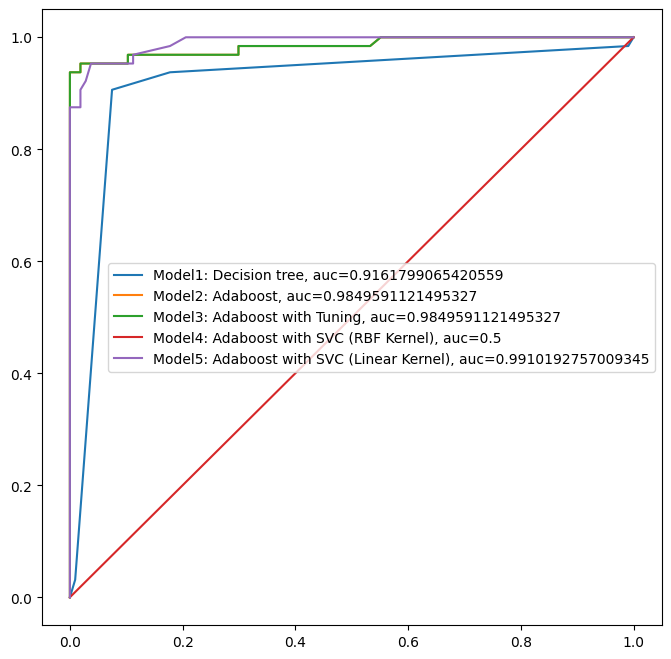

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))

plt.plot(fpr_dtree, tpr_dtree,label="Model1: Decision tree, auc="+str(auc_dtree))
plt.plot(fpr_ab, tpr_ab,label="Model2: Adaboost, auc="+str(auc_adaboost))
plt.plot(fpr_ab_tune,tpr_ab_tune,label="Model3: Adaboost with Tuning, auc="+str(auc_adaboost_tune))
plt.plot(fpr_svc_rbf, tpr_svc_rbf, label="Model4: Adaboost with SVC (RBF Kernel), auc="+str(auc_svc_rbf))
plt.plot(fpr_svc_lin, tpr_svc_lin, label="Model5: Adaboost with SVC (Linear Kernel), auc="+str(auc_svc_linear))

plt.legend(loc=5)
plt.show()
# This gives us the following plot:

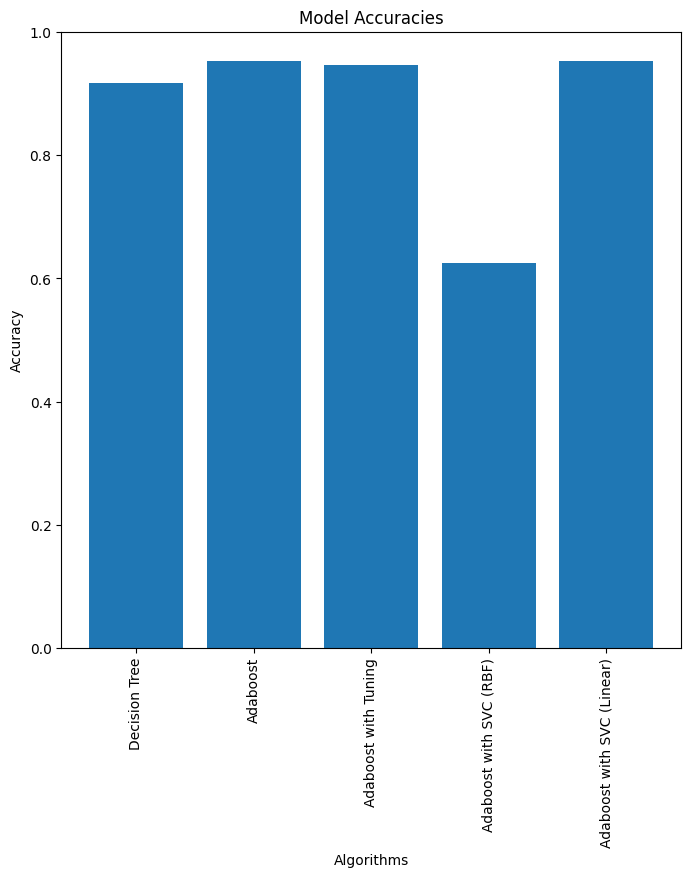

In [26]:
# We can also plot the accuracy of all the models with the following code:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))

label = ['Decision Tree', 'Adaboost', 'Adaboost with Tuning', 'Adaboost with SVC (RBF)', 'Adaboost with SVC (Linear)']

values = [dtree.score(X_test,y_test),
        AdaBoost.score(X_test,y_test),
        AdaBoost_with_tuning.score(X_test,y_test),
        Adaboost_with_svc_rbf.score(X_test,y_test),
        Adaboost_with_svc_linear.score(X_test,y_test)]

def plot_bar_accuracy():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Algorithms', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=90)
    plt.title('Model Accuracies')
    plt.show()

plot_bar_accuracy()
# This gives us the following output:

### See also

In [27]:
# We can also use grid search with AdaBoost:

#grid search using svm
Adaboost_with_svc = AdaBoostClassifier(n_estimators=100, estimator=SVC(probability=True, kernel='linear'), learning_rate=1)

Ada_Grid = {'n_estimators': [10,30,40,100],
           'learning_rate': [0.1, 0.2, 0.3]}

estimator = Adaboost_with_svc
Adaboost_with_grid_search = GridSearchCV(estimator,Ada_Grid).fit(X_train, y_train)
print(Adaboost_with_grid_search.best_params_)
print(Adaboost_with_grid_search.best_score_)
# In the preceding code, we performed a grid search with the n_estimators set to 10, 30, 40, and 100, and learning_rate set to 0.1, 0.2, and 0.3.

{'learning_rate': 0.1, 'n_estimators': 10}
0.9446835443037974


## Implementing a gradient boosting machne for disease risk prediction using scikit-learn

Gradient boosting is a machine learning technique that works on the principle of boosting, where weak learners iteratively shift their focus toward error observations that were difficult to predict in previous iterations and create an ensemble of weak learners, typically decision trees.

Gradient boosting trains models in a sequential manner, and involves the following steps:

1. Fitting a model to the data
2. Fitting a model to the residuals
3. Creating a new model

While the AdaBoost model identifies errors by using weights that have been assigned to the data points, gradient boosting does the same by calculating the gradients in the loss function. The loss function is a measure of how a model is able to fit the data on which it is trained and generally depends on the type of problem being solved. If we are talking about regression problems, mean squared error may be used, while in classification problems, the logarithmic loss can be used. The gradient descent procedure is used to minimize loss when adding trees one at a time. Existing trees in the model remain the same.

There are a handful of hyperparameters that may be tuned for this:

* `n_estimators`: This represents the number of trees in the model. Usually, the higher it is, the better the model learns the data.
* `max_depth`: This signifies how deep our tree is. It is used to control overfitting.
* `min_samples_split`: This is the minimum number of samples required to split an internal node. Values that are too high can prevent the model from learning relations.
* `learning_rate`: This controls the magnitude of change in the estimates. Lower values with a higher number of trees are generally preferred.
* `loss`: This refers to the loss function that is minimized in each split. `deviance` is used in the algorithm as the default parameter, while the other is `exponential`.
* `max_features`: This represents the number of features we have to consider when looking for the best split.
* `criterion`: This function measures the quality of the split and supports `friedman_mse` and `mae` to evaluate the performance of the model.
* `subsample`: This represents the fraction of samples to be used for fitting the individual base learners. Choosing a subsample that is less than $1.0$ leads to a reduction of variance and an increase in bias.
* `min_impurity_split`: This is represented as a threshold to stop tree growth early.

## Getting ready

We will take the same dataset that we used for training our AdaBoost model. In this example, we will see how we can train our model using gradient boosting machines. We will also look at a handful of hyperparameters that can be tuned to improve the model's performance.

First, we must import all the required libraries:

In [28]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import itertools

In [29]:
# Then, we read our data and label encode our target variables to 1 and 0:

# Read the Dataset
df_breastcancer = pd.read_csv("breastcancer.csv")

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_breastcancer['diagnosis'] = lb.fit_transform(df_breastcancer['diagnosis']) 
df_breastcancer.head(5)

# Then, separate our target and feature variables. We split our data into train and test subsets:

# create feature & response variables
# drop the response var and id column as it'll not make any sense to the analysis
X = df_breastcancer.iloc[:,2:31]

# Target variable
y = df_breastcancer.iloc[:,0]

# Create train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify= y)
# This is the same code that we used in the Getting ready section of the AdaBoost example.

### How to do it.

In [30]:
# 1 We will now look at how to use a Gradient Boosting Machines to train our model:

# We imported GradientBoostingClassifier from sklearn.ensemble in the last section, Getting ready.
# We trained our model using GradientBoostingClassifier:
GBM_model = GradientBoostingClassifier() 
GBM_model.fit(X_train, y_train)

# 2 Here, we must pass our test data to the predict() function to make the predictions
# using the model we built in Step 1:
y_pred_gbm = GBM_model.predict(X_test)

# 3 Now, we use classification_report to see the following metrics:
print(classification_report(y_test, y_pred_gbm))
# classification_report gives us the following output:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion matrix, without normalization
[[69  3]
 [ 2 40]]
Test Accuracy:  0.956140350877193
Test AUC:  0.9553571428571429


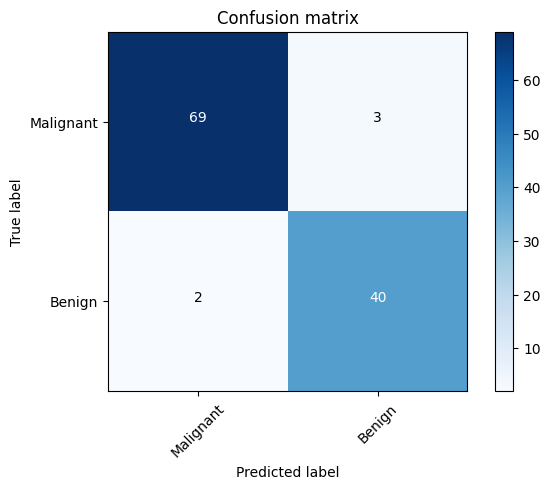

In [31]:
# 4 We will use confusion_matrix() to generate the confusion matrix. We then pass the output of the confusion_matrix
# to our predefined function, that is, plot_confusion_matrix(), to plot the matrix:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(confusion_matrix(y_test, y_pred_gbm), classes=['Malignant', 'Benign'])

# We can check the test accuracy and the AUC value with accuracy_score() and roc_auc_score().
print('Test Accuracy: ', accuracy_score(y_test, y_pred_gbm))
print('Test AUC: ', roc_auc_score(y_test, y_pred_gbm))

### How it works

In Step 1, we trained a gradient boosting classifier model. In Step 2, we used the `predict()` method to make predictions on our test data.

In Step 3, we used `classification_report()` to see various metrics such as precision, recall, and f1-score for each class, as well as the average of each of the metrics. The `classification_report()` reports the averages for the total true positives, false negatives, false positives, unweighted mean per label, and support-weighted mean per label. It also reports a sample average for multi-label classification.

Precision refers to the classifier's ability not to label an instance that is negative as positive, while recall refers to the ability of the classifier to find all positive instances. The f1 score is a weighted harmonic mean of precision and recall. The best f1 score is 1.0 and the worst is 0.0. The support is the number of observations of each class.
In Step 4, we used `confusion_matrix()` to generate the confusion matrix to see the true positives, true negatives, false positives, and false negatives.

In Step 5, we looked at the accuracy and the AUC values of our test data using the `accuracy_score()` and `roc_auc_score()` functions.

In the next section, we will tune our hyperparameters using a grid search to find the optimal model.

### There's more

We will now look at how to fine-tune the hyperparameters for gradient boosting machines:

In [35]:
# 1 First, we import GridSearchCV from sklearn.model_selection:
from sklearn.model_selection import GridSearchCV

# 2 We set the grid parameters to a variable:
parameters = {
    "n_estimators":[100,150,200],
    "loss":["exponential", "log_loss"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "min_samples_split":np.linspace(0.1, 0.5, 4),
    "min_samples_leaf": np.linspace(0.1, 0.5, 4),
    "max_depth":[3, 5, 8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse", "squared_error"],
    "subsample":[0.3, 0.6, 1.0]
}

# 3 We use GridSearchCV, which lets us combine an estimator with a grid search to tune the hyperparameters. The GridSearchCV method selects the optimal parameter from the grid values and uses it with the estimator:
grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1) 
grid.fit(X_train, y_train)

# 4 Then, we can view the optimal parameters:
# Take a look at the following screenshot:
grid.best_estimator_

,loss,'log_loss'
,learning_rate,0.3
,n_estimators,150
,subsample,0.6
,criterion,'squared_error'
,min_samples_split,np.float64(0.1)
,min_samples_leaf,np.float64(0.1)
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [36]:
# 5 We pass our test data to the predict method to get the predictions:
grid_predictions = grid.predict(X_test)
# 6 Again, we can see the metrics that are provided by classification_report:
print(classification_report(y_test, grid_predictions))
# This gives us the following output. We notice that the average precision and f1-score
# improved from the previous case:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion matrix, without normalization
[[70  2]
 [ 1 41]]


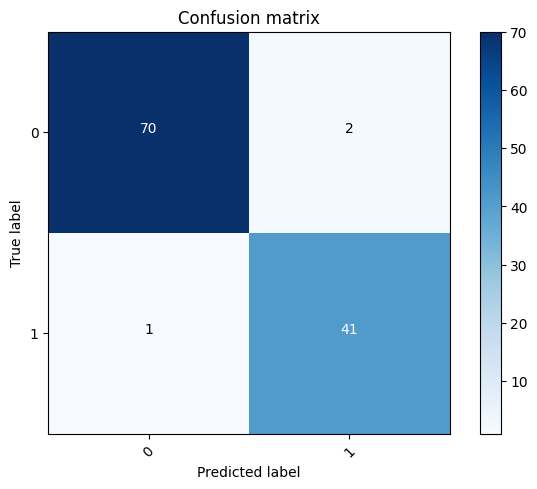

In [37]:
# 7 Now, we will take a look at the confusion matrix and plot it, like we did earlier:
cnf_matrix = confusion_matrix(y_test, grid_predictions)
plot_confusion_matrix(cnf_matrix,classes=[0,1])
# We get the following plot from the preceding code:

In [38]:
# 8 Now, we will look at the accuracy and AUC values again:
print("Accuracy score = {:0.2f}".format(accuracy_score(y_test, grid_predictions)))
print("Area under ROC curve = {:0.2f}".format(roc_auc_score(y_test, grid_predictions)))

Accuracy score = 0.97
Area under ROC curve = 0.97


## Implementing the extreme gradient boosting method for glass identification using XGBoost with Scikit-learn

XGBoost stands for extreme gradient boosting. It is a variant of the gradient boosting machine that aims to improve performance and speed. The XGBoost library in Python implements the gradient boosting decision tree algorithm. The name gradient boosting comes from its us of the gradient descent algorithm to minimize loss when adding new models. XGBoost can handle both regression and classification tasks.

XGBoost is the algorithm of choice among those participating in Kaggle competitions because of its performance and speed of execution in difficult machine learning problems.

Some of the important parameters that are used in XGBoost are as follows:

* `n_estimators/ntrees`: This specifies the number of trees to build. The default value is $50$.
* `max_depth`: This specifies the maximum tree depth. The default value is $6$. Higher values will make the model more complex and may lead to overfitting. Setting this value to $0$ specifies no limit.
* `min_rows`: This specifies the minimum number of observations for a leaf. The default value is $1$.
* `learn_rate`: This specifies the learning rate by which to shrink the feature weights. Shrinking feature weights after each boosting step makes the boosting process more conservative and prevents overfitting. The range is $0.0$ to $1.0$. The default value is $0.3$.
* `sample_rate`: This specifies the row sampling ratio of the training instance (the $x$ axis). For example, setting this value to 0.5 tells XGBoost to randomly collect half of the data instances to grow trees. The default value is $1$ and the range is $0.0$ to $1.0$. Higher values may improve training accuracy.
* `col_sample_rate`: This specifies the column sampling rate (the $y$ axis) for each split in each level. The default value is $1.0$ and the range is from $0$ to $1.0$. Higher values may improve training accuracy.

### Getting ready

You will need the XGBoost library installed to continue with this recipe. You can use the pip command to install the XGBoost library as follows:

In [39]:
!poetry add xgboost

The following packages are already present in the pyproject.toml and will be skipped:

  - xgboost

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [40]:
# Import the required libraries:

# Import required libraries
import os
import pandas as pd
import numpy as np

from numpy import sort

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

import itertools

In [41]:
# read your data:

df_glassdata = pd.read_csv('glassdata.csv')
df_glassdata.shape

(214, 11)

This data has been taken from the UCI ML repository. The column names have been changed according to the data description that's provided at the following link: https://bit.ly/2EZX6IC.

In [42]:
# We take a look at the data:

df_glassdata.head()
# We split our data into a target and feature set, and verify it. Note that we ignore the ID column:

# split data into X and Y
X = df_glassdata.iloc[:,1:10]
y = df_glassdata.iloc[:,10]

print(X.shape)
print(y.shape)
# We confirm that there are no missing values:

df_glassdata.isnull().sum()
# We split our dataset into train and test subsets:

# Create train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(214, 9)
(214,)


In [45]:
# ➡️ ADD THE FOLLOWING CODE TO FIX THE ERROR:
# 1 Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# 2 Initialize and fit the LabelEncoder on the training labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
# 3 Transform the test labels
y_test = le.transform(y_test)

### How to do it

In [47]:
!poetry add graphviz

Using version ^0.21 for graphviz

Updating dependencies
Resolving dependencies... (0.7s)

Package operations: 1 install, 0 updates, 0 removals

  - Installing graphviz (0.21): Pending...
  - Installing graphviz (0.21): Downloading... 0%
  - Installing graphviz (0.21): Downloading... 100%
  - Installing graphviz (0.21): Installing...
  - Installing graphviz (0.21)

Writing lock file


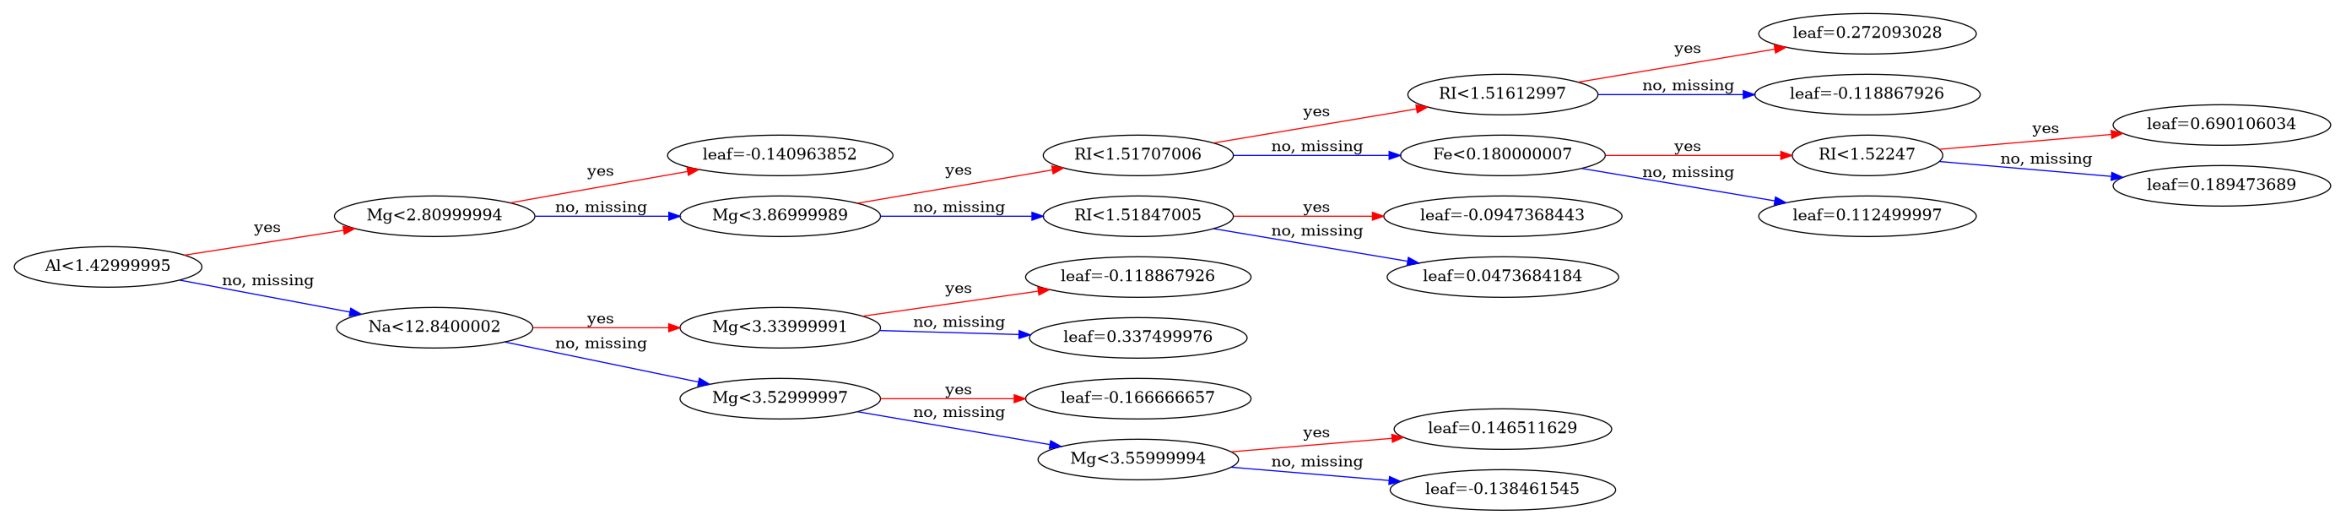

In [50]:
# Now, we will proceed to build our first XGBoost model:

# 1 First, we fit our train data into the XGBoost classifier:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

# 2 We can visualize a single XGBoost decision tree from our trained model. Visualizing decision trees can provide insight into the gradient boosting process:
plot_tree(xg_model, tree_idx=0, rankdir='LR')
import matplotlib.pyplot as pyplot
fig = pyplot.gcf()
fig.set_size_inches(30, 30)
# This gives us the following output:

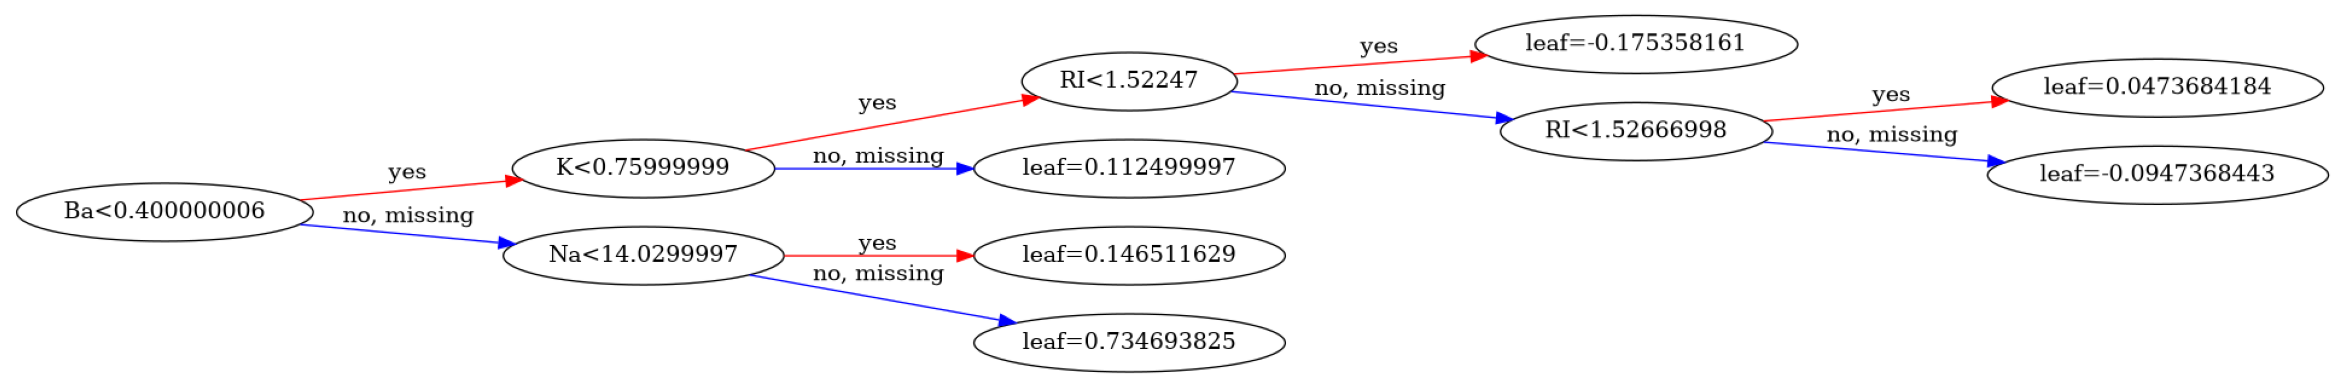

In [51]:
# With num_trees=0, we get the first boosted tree. We can view the other boosted trees by setting the index
# value to the num_trees parameter.

# 3 We set num_trees=5 in the following example:
plot_tree(xg_model, tree_idx=5, rankdir='LR')
fig = pyplot.gcf()
fig.set_size_inches(30, 30)
# The following screenshot shows us the 6th boosted tree:
# You will need the graphviz library installed on your system to plot the boosted trees.

In [53]:
# 4 We will now use predict() on our test data to get the predicted values. We can see our test accuracy with accuracy_score():
test_predictions = xg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))
# By executing this code, we can see the test accuracy is 83.72%

Test Accuracy: 83.72%


In [54]:
# 5 We can see our confusion matrix by using the following code:
confusion_matrix(y_test, test_predictions)

array([[10,  0,  0,  1,  0,  0],
       [ 1, 11,  0,  1,  0,  1],
       [ 1,  0,  2,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]])

In [55]:
# 6 We can then use a predefined function, plot_confusion_matrix(), which we have sourced from https://scikit-learn.org:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10  0  0  1  0  0]
 [ 1 11  0  1  0  1]
 [ 1  0  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


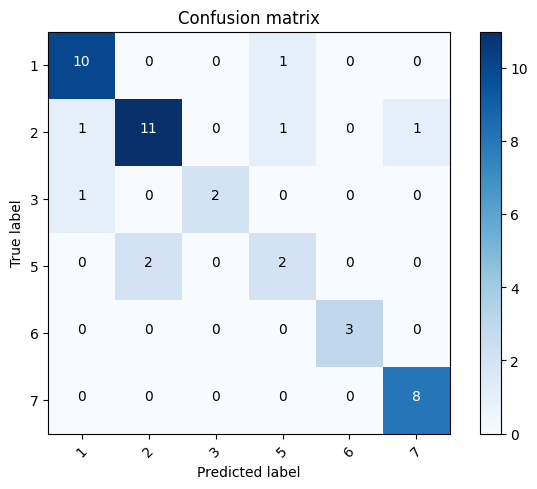

In [56]:
# 7 We then look at the unique values of our target variable to set the names of each level of our target variable:
y.unique()

# In the following code block, we can see the target_names values as 1, 2, 3, 5, 6, and 7. We set the names to each level of our target variable accordingly:

# Set names to each level of our target variable
target_names = [ '1', '2', '3', '5', '6', '7']

# Pass Actual & Predicted values to confusion_matrix()
cm = confusion_matrix(y_test, test_predictions)

plt.figure()
plot_confusion_matrix(cm, classes=target_names)
plt.show()

### How it works

In Step 1, we fit the `XGBoostClassifier` to our train data. In Step 2 and Step 3, we visualized the individual boosted trees. To do this, we used the `plot_tree()` function. We passed our XGBoost model to the `plot_tree()` and set the index of the tree by setting the `num_trees` parameter. The `rankdir='LR'` parameter plotted the tree from left to right. Setting rankdir to UT would plot a vertical tree.

In Step 4, we passed our test subset to `predict()` to get the test accuracy. Step 5 gave us the confusion matrix. In Step 6, we sourced a predefined function, `plot_confusion_matrix()`, from scikit-learn.org. We used this function to plot our confusion matrix. In Step 7, we looked at the unique values of our target variable so that we could set the names for each class of our confusion matrix plot. We then plotted our confusion matrix to evaluate our model.

### There's more

In this section, we will look at how we can check feature importance and perform feature selection based on that. We will also look at how we can evaluate the performance of our XGBoost model using cross-validation.

We can check feature importance with `model.feature_importances_`:

In [57]:
print(xg_model.feature_importances_)

[0.0514456  0.04122689 0.05550225 0.04795417 0.01797942 0.05197253
 0.05790754 0.6222584  0.0537531 ]


We can also visualize feature importance using `plot_importance()`:

Note that we have imported `plot_importance` from the xgboost library.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

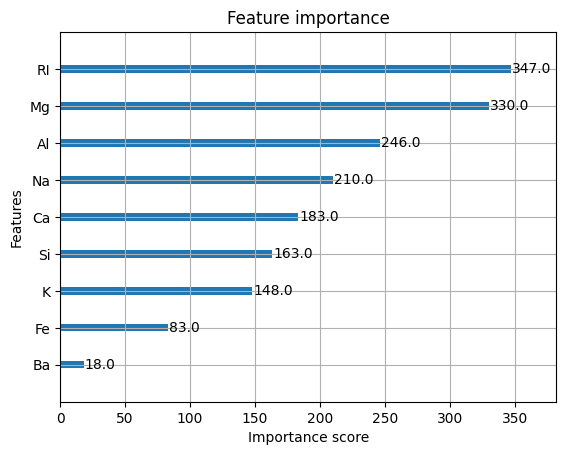

In [58]:
plot_importance(xg_model)

Feature importance can be used for feature selection using `SelectFromModel`.

The `SelectFromModel` class is imported from `sklearn.feature_selection`.

In the following example, the `SelectFromModel` takes the pretrained XGBoost model and provides a subset from our dataset with the selected features. It decides on the selected features based on a threshold value.

Features that have an importance that is greater than or equal to the threshold value are kept, while any others are discarded:

In [60]:
# The threshold value to use for feature selection. 
feature_importance = sort(xg_model.feature_importances_)

# select features using threshold
for each_threshold in feature_importance:
    selection = SelectFromModel(xg_model, threshold=each_threshold, prefit=True)
    
    # Reduce X_train only to the selected feature
    # ➡️ Fix: Convert X_train to a NumPy array to remove feature names
    selected_feature_X_train = selection.transform(X_train.values)
    # selected_feature_X_train = selection.transform(X_train)
    
    # Train the model
    selection_model = XGBClassifier()
    selection_model.fit(selected_feature_X_train, y_train)
    
    # Reduce X_test only to the selected feature
    # ➡️ Fix: Convert X_test to a NumPy array to remove feature names
    selected_feature_X_test = selection.transform(X_test.values)
    # selected_feature_X_test = selection.transform(X_test)

    # Predict using the test value of the selected feature
    predictions = selection_model.predict(selected_feature_X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    print("Threshold=%.5f, Number of Features=%d, Model Accuracy: %.2f%%" % (each_threshold, selected_feature_X_train.shape[1],accuracy*100))
# From the preceding code, we get to see the following output:

Threshold=0.01798, Number of Features=9, Model Accuracy: 83.72%
Threshold=0.04123, Number of Features=8, Model Accuracy: 86.05%
Threshold=0.04795, Number of Features=7, Model Accuracy: 81.40%
Threshold=0.05145, Number of Features=6, Model Accuracy: 81.40%
Threshold=0.05197, Number of Features=5, Model Accuracy: 74.42%
Threshold=0.05375, Number of Features=4, Model Accuracy: 79.07%
Threshold=0.05550, Number of Features=3, Model Accuracy: 76.74%
Threshold=0.05791, Number of Features=2, Model Accuracy: 55.81%
Threshold=0.62226, Number of Features=1, Model Accuracy: 46.51%


We notice that the performance of the model fluctuates with the number of selected features. Based on the preceding output, we decide to opt for eight features that give us an accuracy value of $86\%$. Also, if we use the Occam's razor principle, we can probably opt for a simpler model with four features that gives us a slightly lower accuracy of $71\%$. (observable in the book)

We can also evaluate our models using cross-validation. To perform k-fold cross-validation, we must import the `KFold` class from `sklearn.model_selection`.

First, we create the `KFold` object and mention the number of splits that we would like to have:

In [62]:
kfold = KFold(n_splits=40)
xg_model_with_kfold = XGBClassifier()

cv_results = cross_val_score(xg_model_with_kfold, X_train, y_train, cv=kfold, verbose=True)
print("Mean Accuracy: %.2f%% Standard Deviation %.2f%%" % (cv_results.mean()*100, cv_results.std()*100))
# With cross_val_score(), we evaluate our model, which gives us the mean and standard deviation
# classification accuracy. We notice that we get a mean accuracy of 77.92% and a standard deviation of 22.33%.

Mean Accuracy: 72.88% Standard Deviation 24.62%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.1s finished


In our case, we have a target variable with six classes.

If you have many classes for a multi-class classification task, you may use stratified folds when performing cross-validation:

In [65]:
Stratfold = StratifiedKFold(n_splits=5) # 40 maybe
xg_model_with_stratfold = XGBClassifier()

sf_results = cross_val_score(xg_model_with_stratfold, X_train, y_train, cv=Stratfold, verbose=True)
print("Mean Accuracy: %.2f%% Standard Deviation %.2f%%" % (sf_results.mean()*100, sf_results.std()*100))
# With StratifiedKFold(), we get an improved mean accuracy of 81.18% and a reduced standard deviation of 21.37%.

# Note that n_splits cannot be greater than the number of members in each class.

Mean Accuracy: 74.86% Standard Deviation 7.09%


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished


### See also

LightGBM is an open source software for the gradient boosting framework that was developed by Microsoft. It uses the tree-based algorithm differently to other Gradient Boosting Machines (GBMs): https://bit.ly/2QW53jH